# Discrete Random Variables and Sampling 

### George Tzanetakis, University of Victoria 

In this notebook we will explore discrete random variables and sampling. After defining a helper class and associated functions we will be able to create both symbolic and numeric random variables and generate samples from them. 


Define a helper random variable class based on the scipy discrete random variable functionality providing both numeric and symbolic RVs 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 

In [2]:
class Random_Variable: 
    
    def __init__(self, name, values, probability_distribution): 
        self.name = name 
        self.values = values 
        self.probability_distribution = probability_distribution 
        if all(type(item) is np.int64 for item in values): 
            self.type = 'numeric'
            self.rv = stats.rv_discrete(name = name, values = (values, probability_distribution))
        elif all(type(item) is str for item in values): 
            self.type = 'symbolic'
            self.rv = stats.rv_discrete(name = name, values = (np.arange(len(values)), probability_distribution))
            self.symbolic_values = values 
        else: 
            self.type = 'undefined'
            
    def sample(self,size): 
        if (self.type =='numeric'): 
            return self.rv.rvs(size=size)
        elif (self.type == 'symbolic'): 
            numeric_samples = self.rv.rvs(size=size)
            mapped_samples = [values[x] for x in numeric_samples]
            return mapped_samples 
            
        

Let's first create some random samples of symbolic random variables corresponding to a coin and a dice 

In [19]:
values = ['H', 'T']
probabilities = [0.5, 0.5]
coin = Random_Variable('coin', values, probabilities)
samples = coin.sample(20)
print(samples)

values = ['one', 'two', 'three', 'four', 'five', 'six']
probabilities = [1/6.] * 6
dice = Random_Variable('dice', values, probabilities)
samples = dice.sample(10)
print(samples)


['T', 'H', 'H', 'H', 'T', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'T', 'H']
['six', 'two', 'one', 'three', 'three', 'four', 'three', 'one', 'two', 'four']


Now let's look at a numeric random variable corresponding to a dice so that we can more easily make plots and histograms

In [27]:
values = np.arange(1,7)
probabilities = [1/6.] * 6
dice = Random_Variable('dice', values, probabilities)
samples = dice.sample(5000)
#plt.stem(samples, markerfmt= ' ');

Let's now look at a histogram of these generated samples. Notice that even with 500 samples the bars are not equal length so the calculated frequencies are only approximating the probabilities used to generate them 

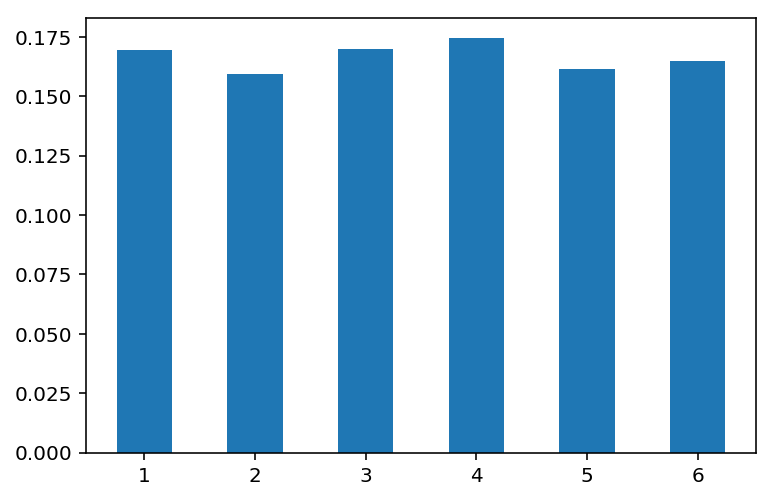

In [28]:
plt.figure()
plt.hist(samples,bins=[1,2,3,4,5,6,7],normed=1, rwidth=0.5,align='left');

Let's plot the cumulative histogram of the samples 

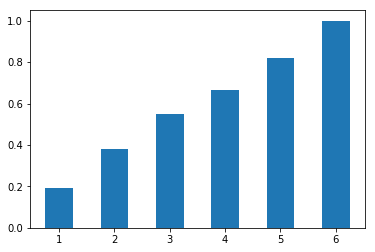

In [6]:
plt.hist(samples,bins=[1,2,3,4,5,6,7],normed=1, rwidth=0.5,align='left', cumulative=True);

Just for fun let's generate a random melody. We will assume all notes have equal duration, there are no rests, and each note is equally likely. 

In [29]:
import music21 as m21 

values = ['c4','c#4','d4','d#4', 'e4', 'f4','f#4', 'g4','g#4','a4','a#4','b4']
probabilities = [1/12.]*12 
note_rv = Random_Variable('note', values, probabilities)
print(note_rv.sample(10))
note_string = 'tinynotation: 4/4 ; ' + " ".join(note_rv.sample(10))
print(note_string)

bachPiece = m21.corpus.parse('bwv66.6')
littleMelody = m21.converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
randomMelody = m21.converter.parse(note_string)
randomMelody.show('midi')
#sp = midi.realtime.StreamPlayer(randomMelody)
#sp.play()

chorales = m21.corpus.search('bach', fileExtensions='xml')
print(chorales)


c = m21.note.Note("C#5")
chorale_probs = np.zeros(12)

totalNotes = 0 
transition_matrix = np.zeros([12,12])
for chorale in chorales: 
    score = chorale.parse()
    analyzedKey = score.analyze('key')
    # only consider C major chorales 
    if (analyzedKey.mode == 'major') and (analyzedKey.tonic.name == 'C'): 
        print(chorale)
        score.parts[0].pitches
        for (i,p) in enumerate(score.parts[0].pitches):  
            chorale_probs[p.pitchClass] += 1
            if i < len(score.parts[0].pitches)-1:
                transition_matrix[p.pitchClass][score.parts[0].pitches[i+1].pitchClass] += 1 
            totalNotes += 1

print('Finished processing')

['f4', 'a4', 'e4', 'd4', 'b4', 'c#4', 'b4', 'c4', 'g4', 'b4']
tinynotation: 4/4 ; a#4 g#4 g#4 g#4 g#4 c4 a4 f4 d#4 f4


<music21.metadata.bundles.MetadataBundle {405 entries}>
<music21.metadata.bundles.MetadataEntry: bach_bwv119_9_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv130_6_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv137_5_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv149_7_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv153_9_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv156_6_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv19_7_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv25_6_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv292_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv293_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv298_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv31_9_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv328_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv346_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv367_mxl>
<music21.metadata.bundles.MetadataEntry: bach_bwv370_mxl>
<

In [16]:
        
print(chorale_probs / totalNotes)
transition_matrix /= transition_matrix.sum()
print(transition_matrix)
print(totalNotes)
#print('Total Notes = ', totalNotes)

note_rv = Random_Variable('note', values, probabilities)
print(note_rv.sample(20))
note_string = 'tinynotation: 4/4 ; ' + " ".join(note_rv.sample(10))
print(note_string)

randomChoraleMelody = m21.converter.parse(note_string)
randomChoraleMelody.show('midi')



[ 0.18492462  0.00301508  0.11758794  0.00201005  0.11457286  0.07487437
  0.01105528  0.20603015  0.          0.17135678  0.00653266  0.1080402 ]
[[ 0.03914591  0.          0.03558719  0.00203355  0.02084392  0.00813421
   0.00203355  0.01881037  0.          0.01626843  0.00050839  0.03558719]
 [ 0.          0.          0.00152517  0.          0.00152517  0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.0350788   0.00050839  0.01931876  0.          0.03355363  0.01169293
   0.00355872  0.00915099  0.          0.00305033  0.          0.00305033]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.00152517  0.          0.00050839]
 [ 0.00813421  0.          0.03304525  0.          0.01576004  0.01881037
   0.00305033  0.02236909  0.          0.01169293  0.00203355  0.        ]
 [ 0.00152517  0.          0.00305033  0.          0.02338587  0.00406711
   0.          0.03457041  0.          0.00711744 

Let's now estimate the frequency of the event *roll even number* in different ways. 
First let's count the number of even numbers in the generated samples. Then let's 
take the sum of the counts of the individual estimated probabilities. 


In [30]:

# we can also write the predicates directly using lambda notation 
est_even = len([x for x in samples if x%2==0]) / len(samples)
est_2 = len([x for x in samples if x==2]) / len(samples)
est_4 = len([x for x in samples if x==4]) / len(samples)
est_6 = len([x for x in samples if x==6]) / len(samples)
print(est_even)
# Let's print some estimates 
print('Estimates of 2,4,6 = ', (est_2, est_4, est_6))
print('Direct estimate = ', est_even) 
print('Sum of estimates = ', est_2 + est_4 + est_6)
print('Theoretical value = ', 0.5)



0.499
Estimates of 2,4,6 =  (0.1596, 0.1744, 0.165)
Direct estimate =  0.499
Sum of estimates =  0.499
Theoretical value =  0.5


Notice that we can always estimate the probability of an event by simply counting how many times it occurs in the samples of an experiment. However if we have multiple events we are interested in then it can be easier to calculate the probabilities of the values of invdividual random variables and then use the rules of probability to estimate the probabilities of more complex events. 

In [ ]:
import numpy as np
import IPython.display as ipd


framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
ipd.Audio(data,rate=framerate)
